In [89]:
import pandas as pd
import re
from datetime import datetime
def parse_lines(lines):
    #"%h %l %u %t \"%r\" %>s %b" - apache log format
    b = '(-|\d+)'
    s = '(-|\d{3})'
#     h = '([\w.-]+)'
    h = '(.+) '
    l = '(-|\w+)'
    u = '(-|\w+)'
    t = '\[([\w:/\- ]+)\]'
    r = '\"(GET|HEAD|POST|PUT|DELETE|CONNECT|OPTIONS|TRACE) (.+)( HTTP/1\.\d)?\"'
    pattern = '^' + h + l + ' ' + u + ' ' + t  + ' ' + r + ' ' +  s + ' ' + b +'$'
    regexp = re.compile(pattern)
    result = {'host':[], 'time':[], 'path':[], 'size':[], 'uri':[]}
    for line in lines:
        #line = line.replace(line[-1], '')
        line = line.rstrip()
        #print(len(line))
        match =  regexp.match(line)
        if match:
            (host, _, __, time, ___, path, version, ____, size) = match.groups()
            path = path.split(' ')[0]
            result['host'].append(host)
            time = datetime.strptime(time, '%d/%b/%Y:%H:%M:%S %z')
            #result['time'].append(int(time.hour*60*60+time.minute*60+time.second))
            result['time'].append(time)
            result['path'].append(path)
            result['size'].append(size)
            result['uri'].append(host + path)
        else:
            print('warning: "%s" missmatch' %line)
    
    return result

In [90]:
filename = '/Users/deniszagorodnev/Desktop/data.log'
with open(filename, 'r', encoding = "ISO 8859-1") as data:
    result = parse_lines(data)
    df1 = pd.DataFrame(data=result)
    df1.head(15)

In [91]:
df1.head(3)

host                      time  \
0          199.72.81.55 1995-07-01 00:00:01-04:00   
1  unicomp6.unicomp.net 1995-07-01 00:00:06-04:00   
2        199.120.110.21 1995-07-01 00:00:09-04:00   

                                           path  size  \
0                              /history/apollo/  6245   
1                           /shuttle/countdown/  3985   
2  /shuttle/missions/sts-73/mission-sts-73.html  4085   

                                                 uri  
0                       199.72.81.55/history/apollo/  
1            unicomp6.unicomp.net/shuttle/countdown/  
2  199.120.110.21/shuttle/missions/sts-73/mission...

In [92]:
#посчитать количество обращений к каждому урлу;
counts = df1['uri'].value_counts()

In [93]:
#найти топ-15 самых посещаемых урлов;
import numpy as np
for i in np.arange(0, 14):
    print(counts[counts == counts[i]])

siltb10.orl.mmc.com/images/KSC-logosmall.gif    2549
Name: uri, dtype: int64
siltb10.orl.mmc.com/images/launch-logo.gif    2541
Name: uri, dtype: int64
siltb10.orl.mmc.com/history/apollo/images/apollo-logo1.gif    2479
Name: uri, dtype: int64
currypc.fpl.msstate.edu/htbin/cdt_main.pl    1917
Name: uri, dtype: int64
piweba3y.prodigy.com/shuttle/missions/sts-71/sts-71-patch-small.gif    1116
Name: uri, dtype: int64
piweba3y.prodigy.com/images/NASA-logosmall.gif    1010
Name: uri, dtype: int64
bill.ksc.nasa.gov/htbin/cdt_main.pl    1006
Name: uri, dtype: int64
bill.ksc.nasa.gov/images/NASA-logosmall.gif    1003
Name: uri, dtype: int64
piweba3y.prodigy.com/images/KSC-logosmall.gif    957
Name: uri, dtype: int64
bill.ksc.nasa.gov/shuttle/countdown/images/cdtclock.gif    928
Name: uri, dtype: int64
helios.astro.uva.nl/shuttle/countdown/video/livevideo.jpeg    861
Name: uri, dtype: int64
edams.ksc.nasa.gov/ksc.html    789
Name: uri, dtype: int64
piweba3y.prodigy.com/shuttle/missions/sts-70/st

In [140]:
#посчитать число запросов в секунду;
times = df1['time']
counts = df1.shape[0]
seconds = (times[-1]-times[0]).total_seconds()
print(counts/seconds)

0.7943204072652027


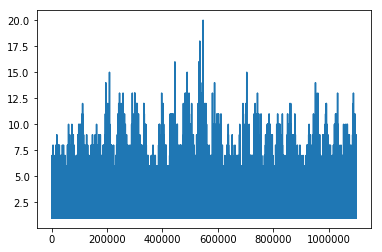

In [157]:
#нарисовать график числа запросов в секунду;
data = np.asarray(df1.groupby(df1["time"]).size().tolist())
import matplotlib.pyplot as plt
plt.plot(data)

In [ ]:
#построить гистограмму распределения размеров запросов.

(array([6155., 2787.,  784.,  371.,  250.,  185.,  158.,  130.,  109.,
          94.,   82.,   77.,   57.,   70.,   43.,   58.,   47.,   42.,
          32.,   40.,   32.,   31.,   47.,   37.,   34.,   24.,   20.,
          20.,   24.,   20.,   25.,   29.,   18.,   18.,   20.,   27.,
          21.,    9.,   24.,   14.,   12.,   21.,    9.,   14.,   14.,
          12.,    7.,    7.,   17.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
        68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]),
 <a list of 49 Patch objects>)

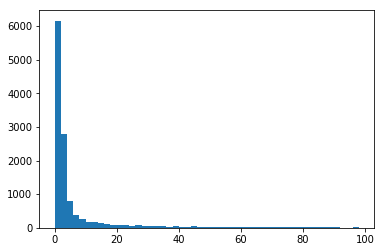

In [164]:
data = np.asarray(df1.groupby(df1["size"]).size().tolist())
bins = np.arange(0, 100, 2)
plt.hist(data, bins=bins)